# <span style="color:blue">**Der Aktien-Finder**</span> <br>

Hierbei werden Aktien anhand einer von **Susan Levermann** entwickelten Methode nach unterschiedlichen KPIs bewertet und bepunktet. Frau Levermann hat dieses Bewertungsmodell in ihrem Buch _Der entspannte Weg zum Reichtum_ literarisch beschrieben.<br>

Wir betrachten in der folgenden Applikation nur die deutschen Aktienindizes, welche nun wie folgt lauten: <br>

1. <span style="color:blue">**DAX**</span>
2. <span style="color:black">**TecDax**</span>
3. <span style="color:red">**MDAX**</span>
<br>

Die __key performance indicators__ (kurz: __KPI__) von Frau Levermann umfassen 13 Kennzahlen. 
Wir beschränken uns zunächst auf folgende vier: <br>

1. Kurs heute gegenüber Kurs von vor 6 Monaten
2. Kurs heute gegenüber Kurs von vor einem Jahr
3. Kurs-Gewinn-Verhältnis (KGV) aktuell
4. Kurs-Gewinn-Verhältnis (KGV) 5 Jahre
<br>

Für jedes dieser Kriterien gibt es folgende mögliche Punktevergaben **+1** ; **0** oder **-1** .
Die Gesamtpunktzahl ergibt den ***LEVERMAN-SCORE***.
Besitzt dieser Score mindestens 4 Punkte sollte die Aktie <span style="color:green"> ***gekauft*** </span> werden (Large Caps).
Bei Small- & Mid Caps sollten 7 Punkte beachtet werden, da kleine Unternehmen größeren Risiken ausgesetzt sind.



## Importieren gängiger APIs zum Erstellen des Dashboardes

In [295]:
# Zeitfenster definieren

from datetime import date    

# Beginn des Zeitfenster zur Ermittlung der Kennzahlen HEUTE vor einem Jahr
start = (datetime.date.today() - datetime.timedelta(395)).isoformat()

# Beginn des Zeitfenster zur Ermittlung der Kennzahlen HEUTE vor einem halben Jahr
halftime = (datetime.date.today() - datetime.timedelta(214)).isoformat()

# Ende des Zeitfenster stellt der heutige Tag dar. ^^
#end = date.today().isoformat()
end = '2020-01-03'

In [296]:
# Benötigte API laden

import os
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import yfinance as yf
from pandas_datareader import data as pdr 
yf.pdr_override()

In [297]:
# linienstaerke definieren

paper_rc = {'lines.linewidth': 0.9, 'lines.markersize': 10}
sns.set_context('paper', rc = paper_rc)

## Datenbezug der Indizes DAX, TecDAX, MDAX erstellen

### Aktien von DAX laden

In [298]:

# DAX Chart vom letzten Jahr laden.

dax_m = pdr.get_data_yahoo("^GDAXI", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


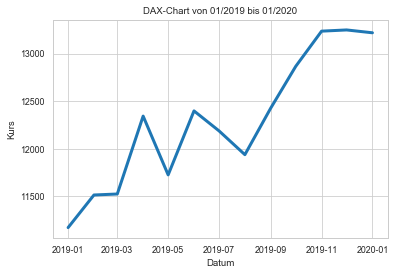

In [299]:

# DAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(dax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('DAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


In [300]:

# Über den Yahoo finance API mit den oben definierten Startwerten einlesen.

adidas = pdr.get_data_yahoo('ADS.DE', start=start, end=end, interval= '1d')
bmw = pdr.get_data_yahoo('BMW.DE', start=start, end=end, interval= '1d')
heise = pdr.get_data_yahoo('HEI.DE', start=start, end=end, interval= '1d')
ifx = pdr.get_data_yahoo('IFX.DE', start=start, end=end, interval= '1d')
cov = pdr.get_data_yahoo('1COV.DE', start=start, end=end, interval= '1d')
fme = pdr.get_data_yahoo('FME.DE', start=start, end=end, interval= '1d')
fre = pdr.get_data_yahoo('FRE.DE', start=start, end=end, interval= '1d')
sap = pdr.get_data_yahoo('SAP.DE', start=start, end=end, interval= '1d')
dai = pdr.get_data_yahoo('DAI.DE', start=start, end=end, interval= '1d')
muv2 = pdr.get_data_yahoo('MUV2.DE', start=start, end=end, interval= '1d')
vow3 = pdr.get_data_yahoo('VOW3.DE', start=start, end=end, interval= '1d')
alv = pdr.get_data_yahoo('ALV.DE', start=start, end=end, interval= '1d')
bas = pdr.get_data_yahoo('BAS.DE', start=start, end=end, interval= '1d')
lin = pdr.get_data_yahoo('LIN.DE', start=start, end=end, interval= '1d')
bayn = pdr.get_data_yahoo('BAYN.DE', start=start, end=end, interval= '1d')
dpw = pdr.get_data_yahoo('DPW.DE', start=start, end=end, interval= '1d')
dte = pdr.get_data_yahoo('DTE.DE', start=start, end=end, interval= '1d')
con = pdr.get_data_yahoo('CON.DE', start=start, end=end, interval= '1d')
vna = pdr.get_data_yahoo('VNA.DE', start=start, end=end, interval= '1d')
bei = pdr.get_data_yahoo('BEI.DE', start=start, end=end, interval= '1d')
mrk = pdr.get_data_yahoo('MRK.DE', start=start, end=end, interval= '1d')
rwe = pdr.get_data_yahoo('RWE.DE', start=start, end=end, interval= '1d')
hen3 = pdr.get_data_yahoo('HEN3.DE', start=start, end=end, interval= '1d')
lha = pdr.get_data_yahoo('LHA.DE', start=start, end=end, interval= '1d')
eon = pdr.get_data_yahoo('EOAN.DE', start=start, end=end, interval= '1d')
sie = pdr.get_data_yahoo('SIE.DE', start=start, end=end, interval= '1d')
dbahn = pdr.get_data_yahoo('DB1.DE', start=start, end=end, interval= '1d')
tka = pdr.get_data_yahoo('TKA.DE', start=start, end=end, interval= '1d')
wdi = pdr.get_data_yahoo('WDI.DE', start=start, end=end, interval= '1d')
arl = pdr.get_data_yahoo('ARL.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Aktien von MDAX laden

In [301]:
# DAX Chart vom letzten Jahr laden.

mdax_m = pdr.get_data_yahoo("^MDAXI", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


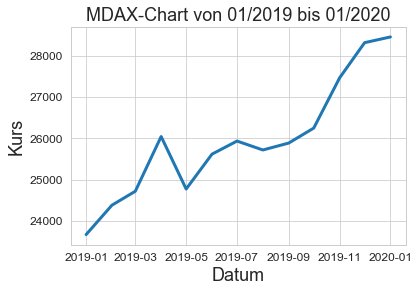

In [302]:
# MDAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(mdax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('MDAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [303]:

# Über den Yahoo finance API mit den oben definierten Startwerten einlesen.

snh = pdr.get_data_yahoo('SNH.DE', start=start, end=end, interval= '1d')
fie = pdr.get_data_yahoo('FIE.DE', start=start, end=end, interval= '1d')
deq = pdr.get_data_yahoo('DEQ.DE', start=start, end=end, interval= '1d')
evd = pdr.get_data_yahoo('EVD.DE', start=start, end=end, interval= '1d')
sha = pdr.get_data_yahoo('SHA.DE', start=start, end=end, interval= '1d')
gil = pdr.get_data_yahoo('GIL.DE', start=start, end=end, interval= '1d')
osr = pdr.get_data_yahoo('OSR.DE', start=start, end=end, interval= '1d')
hnr1 = pdr.get_data_yahoo('HNR1.DE', start=start, end=end, interval= '1d')
jun = pdr.get_data_yahoo('JUN3.DE', start=start, end=end, interval= '1d')
szu = pdr.get_data_yahoo('SZU.DE', start=start, end=end, interval= '1d')
fpe3 = pdr.get_data_yahoo('FPE3.DE', start=start, end=end, interval= '1d')
teg = pdr.get_data_yahoo('TEG.DE', start=start, end=end, interval= '1d')
arl = pdr.get_data_yahoo('ARL.DE', start=start, end=end, interval= '1d')
leg = pdr.get_data_yahoo('LEG.DE', start=start, end=end, interval= '1d')
#saz = pdr.get_data_yahoo('SAZ.DE', start=start, end=end, interval= '1d')
krn = pdr.get_data_yahoo('KRN.DE', start=start, end=end, interval= '1d')
kgx = pdr.get_data_yahoo('KGX.DE', start=start, end=end, interval= '1d')
zal = pdr.get_data_yahoo('ZAL.DE', start=start, end=end, interval= '1d')
rrtl = pdr.get_data_yahoo('RRTL.DE', start=start, end=end, interval= '1d')
boss = pdr.get_data_yahoo('BOSS.DE', start=start, end=end, interval= '1d')
gxi = pdr.get_data_yahoo('GXI.DE', start=start, end=end, interval= '1d')
evk = pdr.get_data_yahoo('EVK.DE', start=start, end=end, interval= '1d')
hot = pdr.get_data_yahoo('HOT.DE', start=start, end=end, interval= '1d')
noej = pdr.get_data_yahoo('NOEJ.DE', start=start, end=end, interval= '1d')
lxs = pdr.get_data_yahoo('LXS.DE', start=start, end=end, interval= '1d')
#meo = pdr.get_data_yahoo('MEO.DE', start=start, end=end, interval= '1d')
rhk = pdr.get_data_yahoo('RHK.DE', start=start, end=end, interval= '1d')
due = pdr.get_data_yahoo('DUE.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Aktien vom TecDax laden

In [304]:
# DAX Chart vom letzten Jahr laden.

tecdax_m = pdr.get_data_yahoo("^TECDAX", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


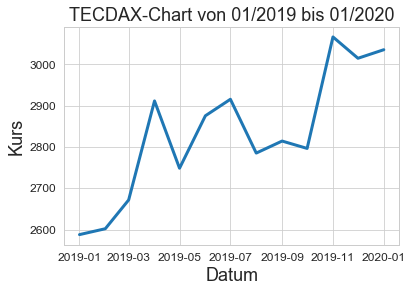

In [305]:
# TECDAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(tecdax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('TECDAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [306]:
#o1bc = pdr.get_data_yahoo('O1BC.DE', start=start, end=end, interval= '1d')
cok = pdr.get_data_yahoo('COK.DE', start=start, end=end, interval= '1d')
drw3 = pdr.get_data_yahoo('DRW3.DE', start=start, end=end, interval= '1d')
cop = pdr.get_data_yahoo('COP.DE', start=start, end=end, interval= '1d')
afx = pdr.get_data_yahoo('AFX.DE', start=start, end=end, interval= '1d')
nem = pdr.get_data_yahoo('NEM.DE', start=start, end=end, interval= '1d')
qia = pdr.get_data_yahoo('QIA.DE', start=start, end=end, interval= '1d')
wdi = pdr.get_data_yahoo('WDI.DE', start=start, end=end, interval= '1d')
o2d = pdr.get_data_yahoo('O2D.DE', start=start, end=end, interval= '1d')
pfv = pdr.get_data_yahoo('PFV.DE', start=start, end=end, interval= '1d')
sbs = pdr.get_data_yahoo('SBS.DE', start=start, end=end, interval= '1d')
srt3 = pdr.get_data_yahoo('SRT3.DE', start=start, end=end, interval= '1d')
s92 = pdr.get_data_yahoo('S92.DE', start=start, end=end, interval= '1d')
fntn = pdr.get_data_yahoo('FNTN.DE', start=start, end=end, interval= '1d')
utdi = pdr.get_data_yahoo('UTDI.DE', start=start, end=end, interval= '1d')
am3d = pdr.get_data_yahoo('AM3D.DE', start=start, end=end, interval= '1d')
mor = pdr.get_data_yahoo('MOR.DE', start=start, end=end, interval= '1d')
sow = pdr.get_data_yahoo('SOW.DE', start=start, end=end, interval= '1d')
jen = pdr.get_data_yahoo('JEN.DE', start=start, end=end, interval= '1d')
gft = pdr.get_data_yahoo('GFT.DE', start=start, end=end, interval= '1d')
ndx1 = pdr.get_data_yahoo('NDX1.DE', start=start, end=end, interval= '1d')
dlg = pdr.get_data_yahoo('DLG.DE', start=start, end=end, interval= '1d')
dri = pdr.get_data_yahoo('DRI.DE', start=start, end=end, interval= '1d')
smhn = pdr.get_data_yahoo('SMHN.DE', start=start, end=end, interval= '1d')
bc8 = pdr.get_data_yahoo('BC8.DE', start=start, end=end, interval= '1d')
aixa = pdr.get_data_yahoo('AIXA.DE', start=start, end=end, interval= '1d')
adv = pdr.get_data_yahoo('ADV.DE', start=start, end=end, interval= '1d')
evt = pdr.get_data_yahoo('EVT.DE', start=start, end=end, interval= '1d')
waf = pdr.get_data_yahoo('WAF.DE', start=start, end=end, interval= '1d')
rib = pdr.get_data_yahoo('RIB.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [307]:
# Selektieren nach dem Adj Close 

adidasclose=adidas['Adj Close']
bmwclose=bmw['Adj Close']
heiseclose=heise['Adj Close']
ifxclose=ifx['Adj Close']
covclose=cov['Adj Close']
fmeclose=fme['Adj Close']
freclose=fre['Adj Close']
sapclose=sap['Adj Close']
daiclose=dai['Adj Close']
muv2close=muv2['Adj Close']
vow3close=vow3['Adj Close']
alvclose=alv['Adj Close']
basclose=bas['Adj Close']
linclose=lin['Adj Close']
baynclose=bayn['Adj Close']
dpwclose=dpw['Adj Close']
dteclose=dte['Adj Close']
conclose=con['Adj Close']
vnaclose=vna['Adj Close']
beiclose=bei['Adj Close']
mrkclose=mrk['Adj Close']
rweclose=rwe['Adj Close']
hen3close=hen3['Adj Close']
lhaclose=lha['Adj Close']
eonclose=eon['Adj Close']
sieclose=sie['Adj Close']
dbahnclose=dbahn['Adj Close']
tkaclose=tka['Adj Close']
wdiclose=wdi['Adj Close']
arlclose=arl['Adj Close']




In [308]:
print(adidasclose)

Date
2018-12-06    190.954865
2018-12-07    192.829391
2018-12-10    190.214935
2018-12-11    194.851913
2018-12-12    196.430466
2018-12-13    197.318390
2018-12-14    192.878723
2018-12-17    184.344711
2018-12-18    183.703415
2018-12-19    184.542023
2018-12-20    181.286270
2018-12-21    182.272858
2018-12-27    177.685211
2018-12-28    179.954361
2019-01-02    181.927551
2019-01-03    181.483582
2019-01-04    188.488388
2019-01-07    187.156494
2019-01-08    191.694809
2019-01-09    191.250854
2019-01-10    192.878723
2019-01-11    194.358612
2019-01-14    194.654587
2019-01-15    196.578445
2019-01-16    195.443863
2019-01-17    197.318390
2019-01-18    201.264755
2019-01-21    203.237946
2019-01-22    203.040619
2019-01-23    204.520508
                 ...    
2019-11-18    270.950012
2019-11-19    272.149994
2019-11-20    273.000000
2019-11-21    273.000000
2019-11-22    273.000000
2019-11-25    274.950012
2019-11-26    278.549988
2019-11-27    281.950012
2019-11-28    281.95

In [328]:
adidas_1y=((adidasclose[end]-adidasclose[start])/adidasclose[end]*100)
bmw_1y=((bmwclose[end]-bmwclose[start])/bmwclose[end]*100)
heise_1y=((heiseclose[end]-heiseclose[start])/heiseclose[end]*100)
ifx_1y=((ifxclose[end]-ifxclose[start])/ifxclose[end]*100)
cov_1y=((covclose[end]-covclose[start])/covclose[end]*100)
fme_1y=((fmeclose[end]-fmeclose[start])/fmeclose[end]*100)
#fre_1y=((freclose[end]-freclose[start])/freclose[end]*100)<-- 2019-05-15 NaN Eintrag
sap_1y=((sapclose[end]-sapclose[start])/sapclose[end]*100)
dai_1y=((daiclose[end]-daiclose[start])/daiclose[end]*100)
muv2_1y=((muv2close[end]-muv2close[start])/muv2close[end]*100)
vow3_1y=((vow3close[end]-vow3close[start])/vow3close[end]*100)
alv_1y=((alvclose[end]-alvclose[start])/alvclose[end]*100)
bas_1y=((basclose[end]-basclose[start])/basclose[end]*100)
lin_1y=((linclose[end]-linclose[start])/linclose[end]*100)
bayn_1y=((baynclose[end]-baynclose[start])/baynclose[end]*100)
dpw_1y=((dpwclose[end]-dpwclose[start])/dpwclose[end]*100)
dte_1y=((dteclose[end]-dteclose[start])/dteclose[end]*100)
con_1y=((conclose[end]-conclose[start])/conclose[end]*100)
vna_1y=((vnaclose[end]-vnaclose[start])/vnaclose[end]*100)
bei_1y=((beiclose[end]-beiclose[start])/beiclose[end]*100)
mrk_1y=((mrkclose[end]-mrkclose[start])/mrkclose[end]*100)
rwe_1y=((rweclose[end]-rweclose[start])/rweclose[end]*100)
hen3_1y=((hen3close[end]-hen3close[start])/hen3close[end]*100)
lha_1y=((lhaclose[end]-lhaclose[start])/lhaclose[end]*100)
#eon_1y=((eonclose[end]-eonclose[start])/eonclose[end]*100)<-- 2019-05-15 NaN Eintrag
sie_1y=((sieclose[end]-sieclose[start])/sieclose[end]*100)
dbahn_1y=((dbahnclose[end]-dbahnclose[start])/dbahnclose[end]*100)
tka_1y=((tkaclose[end]-tkaclose[start])/tkaclose[end]*100)
#wdi_1y=((wdiclose[end]-wdiclose[start])/wdiclose[end]*100) <-- 2019-05-15 NaN Eintrag
arl_1y=((arlclose[end]-arlclose[start])/arlclose[end]*100)



In [332]:
print(adidas_1y)
print(bmw_1y)
print(heise_1y)
print(ifx_1y)
print(cov_1y)
print(fme_1y)
#print(fre_1y) <-- 2019-05-15 NaN Eintrag
print(sap_1y)
print(dai_1y)
print(muv2_1y)
print(vow3_1y)
print(alv_1y)
print(bas_1y)
print(lin_1y)
print(bayn_1y)
print(dpw_1y)
print(dte_1y)
print(con_1y)
print(vna_1y)
print(bei_1y)
print(mrk_1y)
print(rwe_1y)
print(hen3_1y)
print(lha_1y)
#print(eon_1y) <-- 2019-05-15 NaN Eintrag
print(sie_1y)
print(dbahn_1y)
print(tka_1y)
#print(wdi_1y) <-- 2019-05-15 NaN Eintrag
print(arl_1y)

34.59330141540093
6.633691976617757
16.558707303768195
13.828951513867988
-4.360180607245157
-0.4215153119036259
27.98230887419688
10.514283697490384
32.107861623123725
21.68459312357624
23.104223483683544
13.37378375684017
28.952847707488445
17.97708364561852
24.914155201977504
1.7891279564131561
-6.099365397450411
15.968488087861743
13.126819022026456
12.800701292522582
31.983294354916076
-6.100889332129402
-20.10621937567672
19.258890480422366
22.470565531904555
-29.640478842918906
17.181238224504714


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-06-03  144.300003  145.199997  139.449997  145.199997  145.012650   
2019-06-04  143.500000  146.699997  142.100006  145.149994  144.962708   
2019-06-05  146.899994  150.399994  145.899994  148.800003  148.608002   
2019-06-06  149.199997  149.449997  140.550003  145.050003  144.862839   
2019-06-07  146.800003  147.399994  140.300003  146.550003  146.360901   
2019-06-11  148.500000  149.750000  145.800003  149.649994  149.456894   
2019-06-12  148.300003  149.050003  146.050003  147.250000  147.059998   
2019-06-13  148.600006  152.800003  148.100006  150.899994  150.705292   
2019-06-14  151.250000  151.649994  148.500000  149.449997  149.257156   
2019-06-17  151.300003  152.000000  149.600006  151.300003  151.104782   
2019-06-18  152.050003  156.000000  150.300003  155.000000  154.800003   
2019-06-19  154.600006  154.949997  15